In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('/content/CrimesOnWomenData.csv')
print("5 First Row Dataset:")
print(df.head())

5 First Row Dataset:
   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0


In [ ]:
# Displays dataset information: number of rows, columns, and data types
print("/n Dataset Information:")
print(df.info())

/n Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2944 non-null   int64 
 1   State       2944 non-null   object
 2   Year        2944 non-null   int64 
 3   Rape        2944 non-null   int64 
 4   K&A         2944 non-null   int64 
 5   DD          2944 non-null   int64 
 6   AoW         2944 non-null   int64 
 7   AoM         2944 non-null   int64 
 8   DV          2944 non-null   int64 
 9   WT          2944 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 230.1+ KB
None


In [ ]:
# Check descriptive statistics to understand the distribution of numerical data
print("nDescriptive Statistics of Numerical Data:")
print(df.describe())

nDescriptive Statistics of Numerical Data:
        Unnamed: 0         Year         Rape           K&A           DD  \
count  2944.000000  2944.000000  2944.000000   2944.000000  2944.000000   
mean    367.500000  2011.149457   727.855978   1134.542120   215.692935   
std     212.500797     6.050367   976.526844   1992.520495   424.710700   
min       0.000000  2001.000000     0.000000      0.000000     0.000000   
25%     183.750000  2006.000000    35.000000     24.750000     1.000000   
50%     367.500000  2011.000000   348.500000    290.000000    29.000000   
75%     551.250000  2016.000000  1069.000000   1216.000000   259.000000   
max     735.000000  2021.000000  6337.000000  15381.000000  2524.000000   

                AoW          AoM            DV           WT  
count   2944.000000  2944.000000   2944.000000  2944.000000  
mean    1579.115489   332.722826   2595.078804    28.744565  
std     2462.706356   805.613629   4039.944283    79.958875  
min        0.000000     0.000000 

In [ ]:
# 2. Dealing with Lost Data
# Check for lost data
print("nCheck for Lost Data:")
print(df.isnull().sum())

nCheck for Lost Data:
Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64


In [ ]:
# 3. Distribution and Correlation Analysis
# Visualization of numerical variable distribution
numerical_columns = df.select_dtypes(include=[np.number]).columns

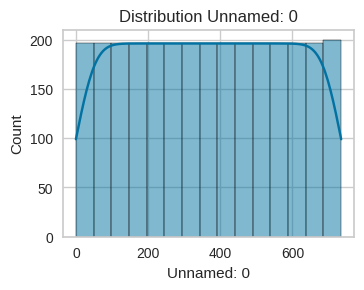

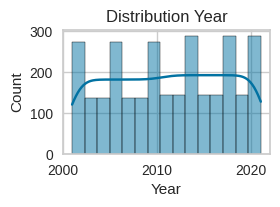

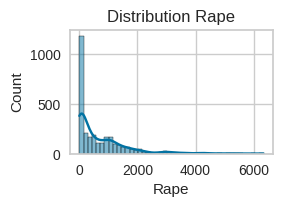

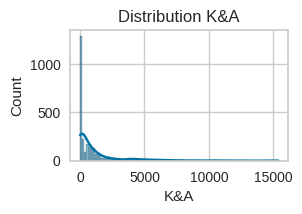

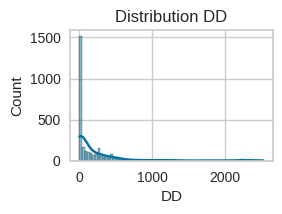

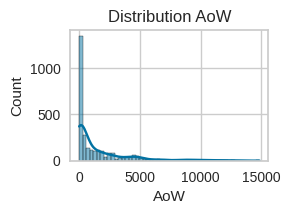

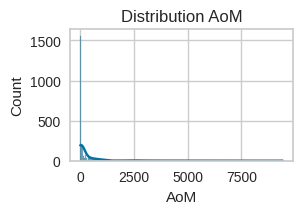

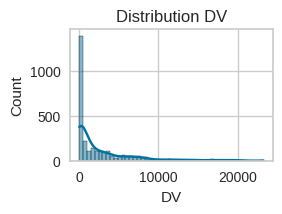

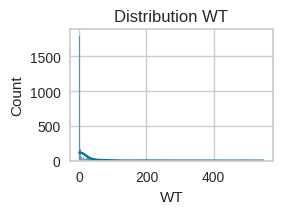

In [ ]:
# Histogram for numeric variables
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution {col}')
    plt.tight_layout()
    plt.show()

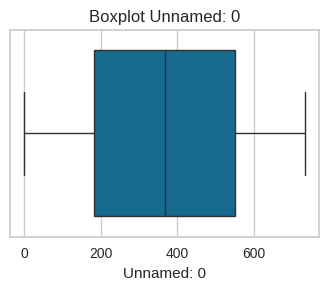

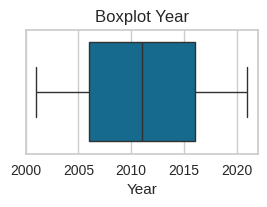

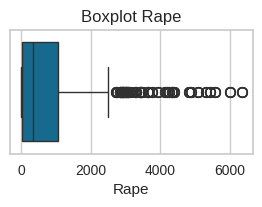

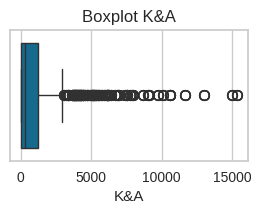

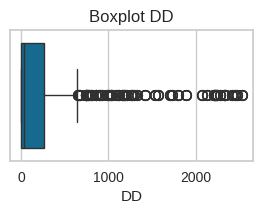

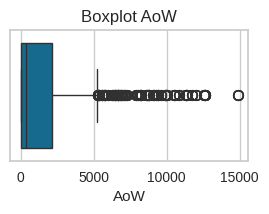

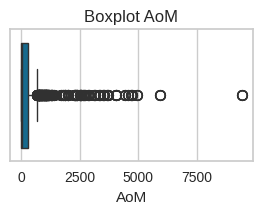

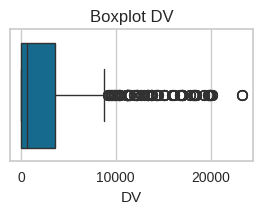

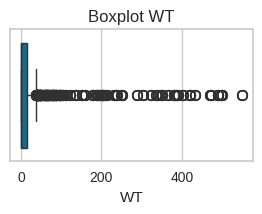

In [ ]:
# Boxplot for numeric variables
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.tight_layout()
    plt.show()

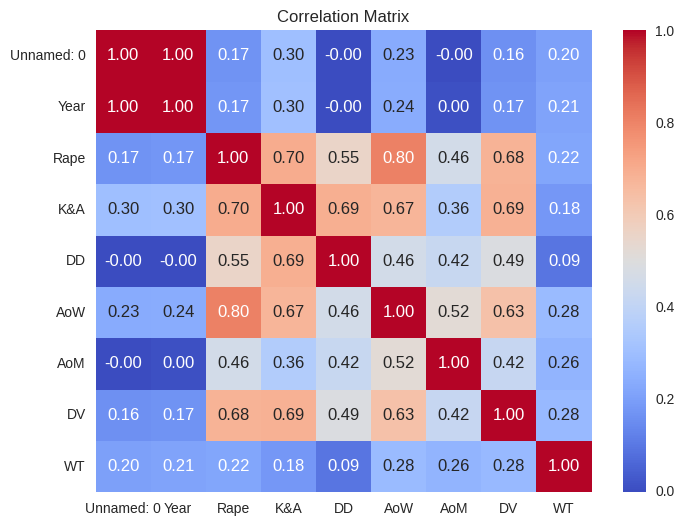

In [ ]:
# Correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

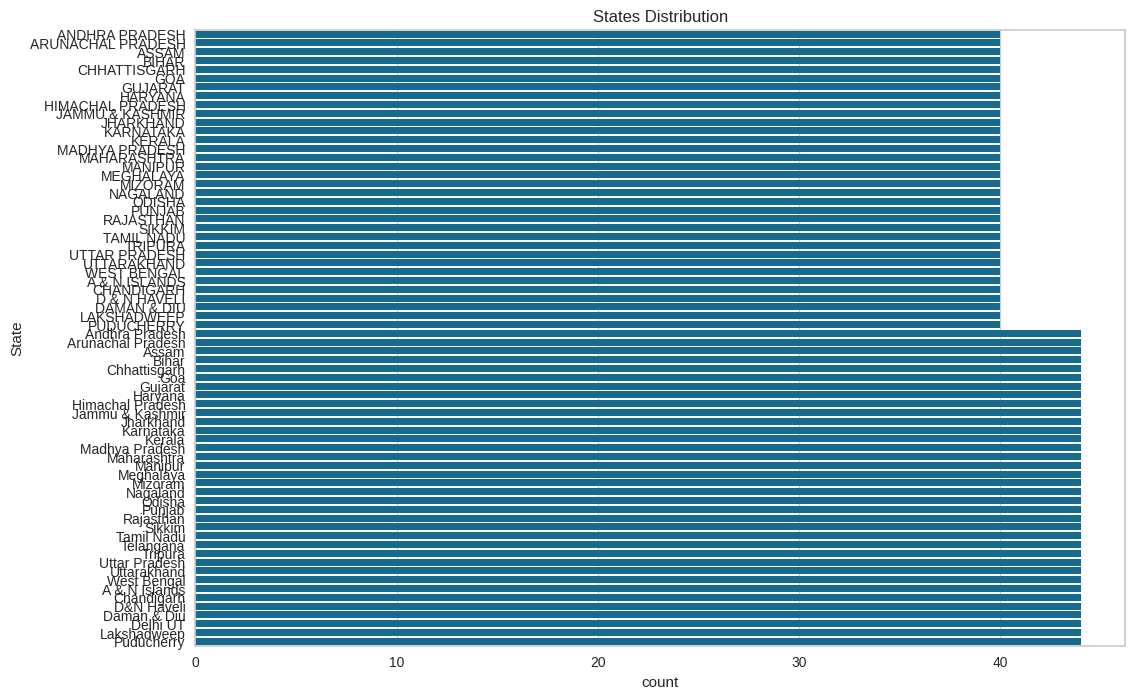

In [ ]:
# 4. Data Visualization
# Distribution of categorical variables
plt.figure(figsize=(12, 8))
sns.countplot(y='State', data=df)
plt.title('States Distribution')
plt.show()

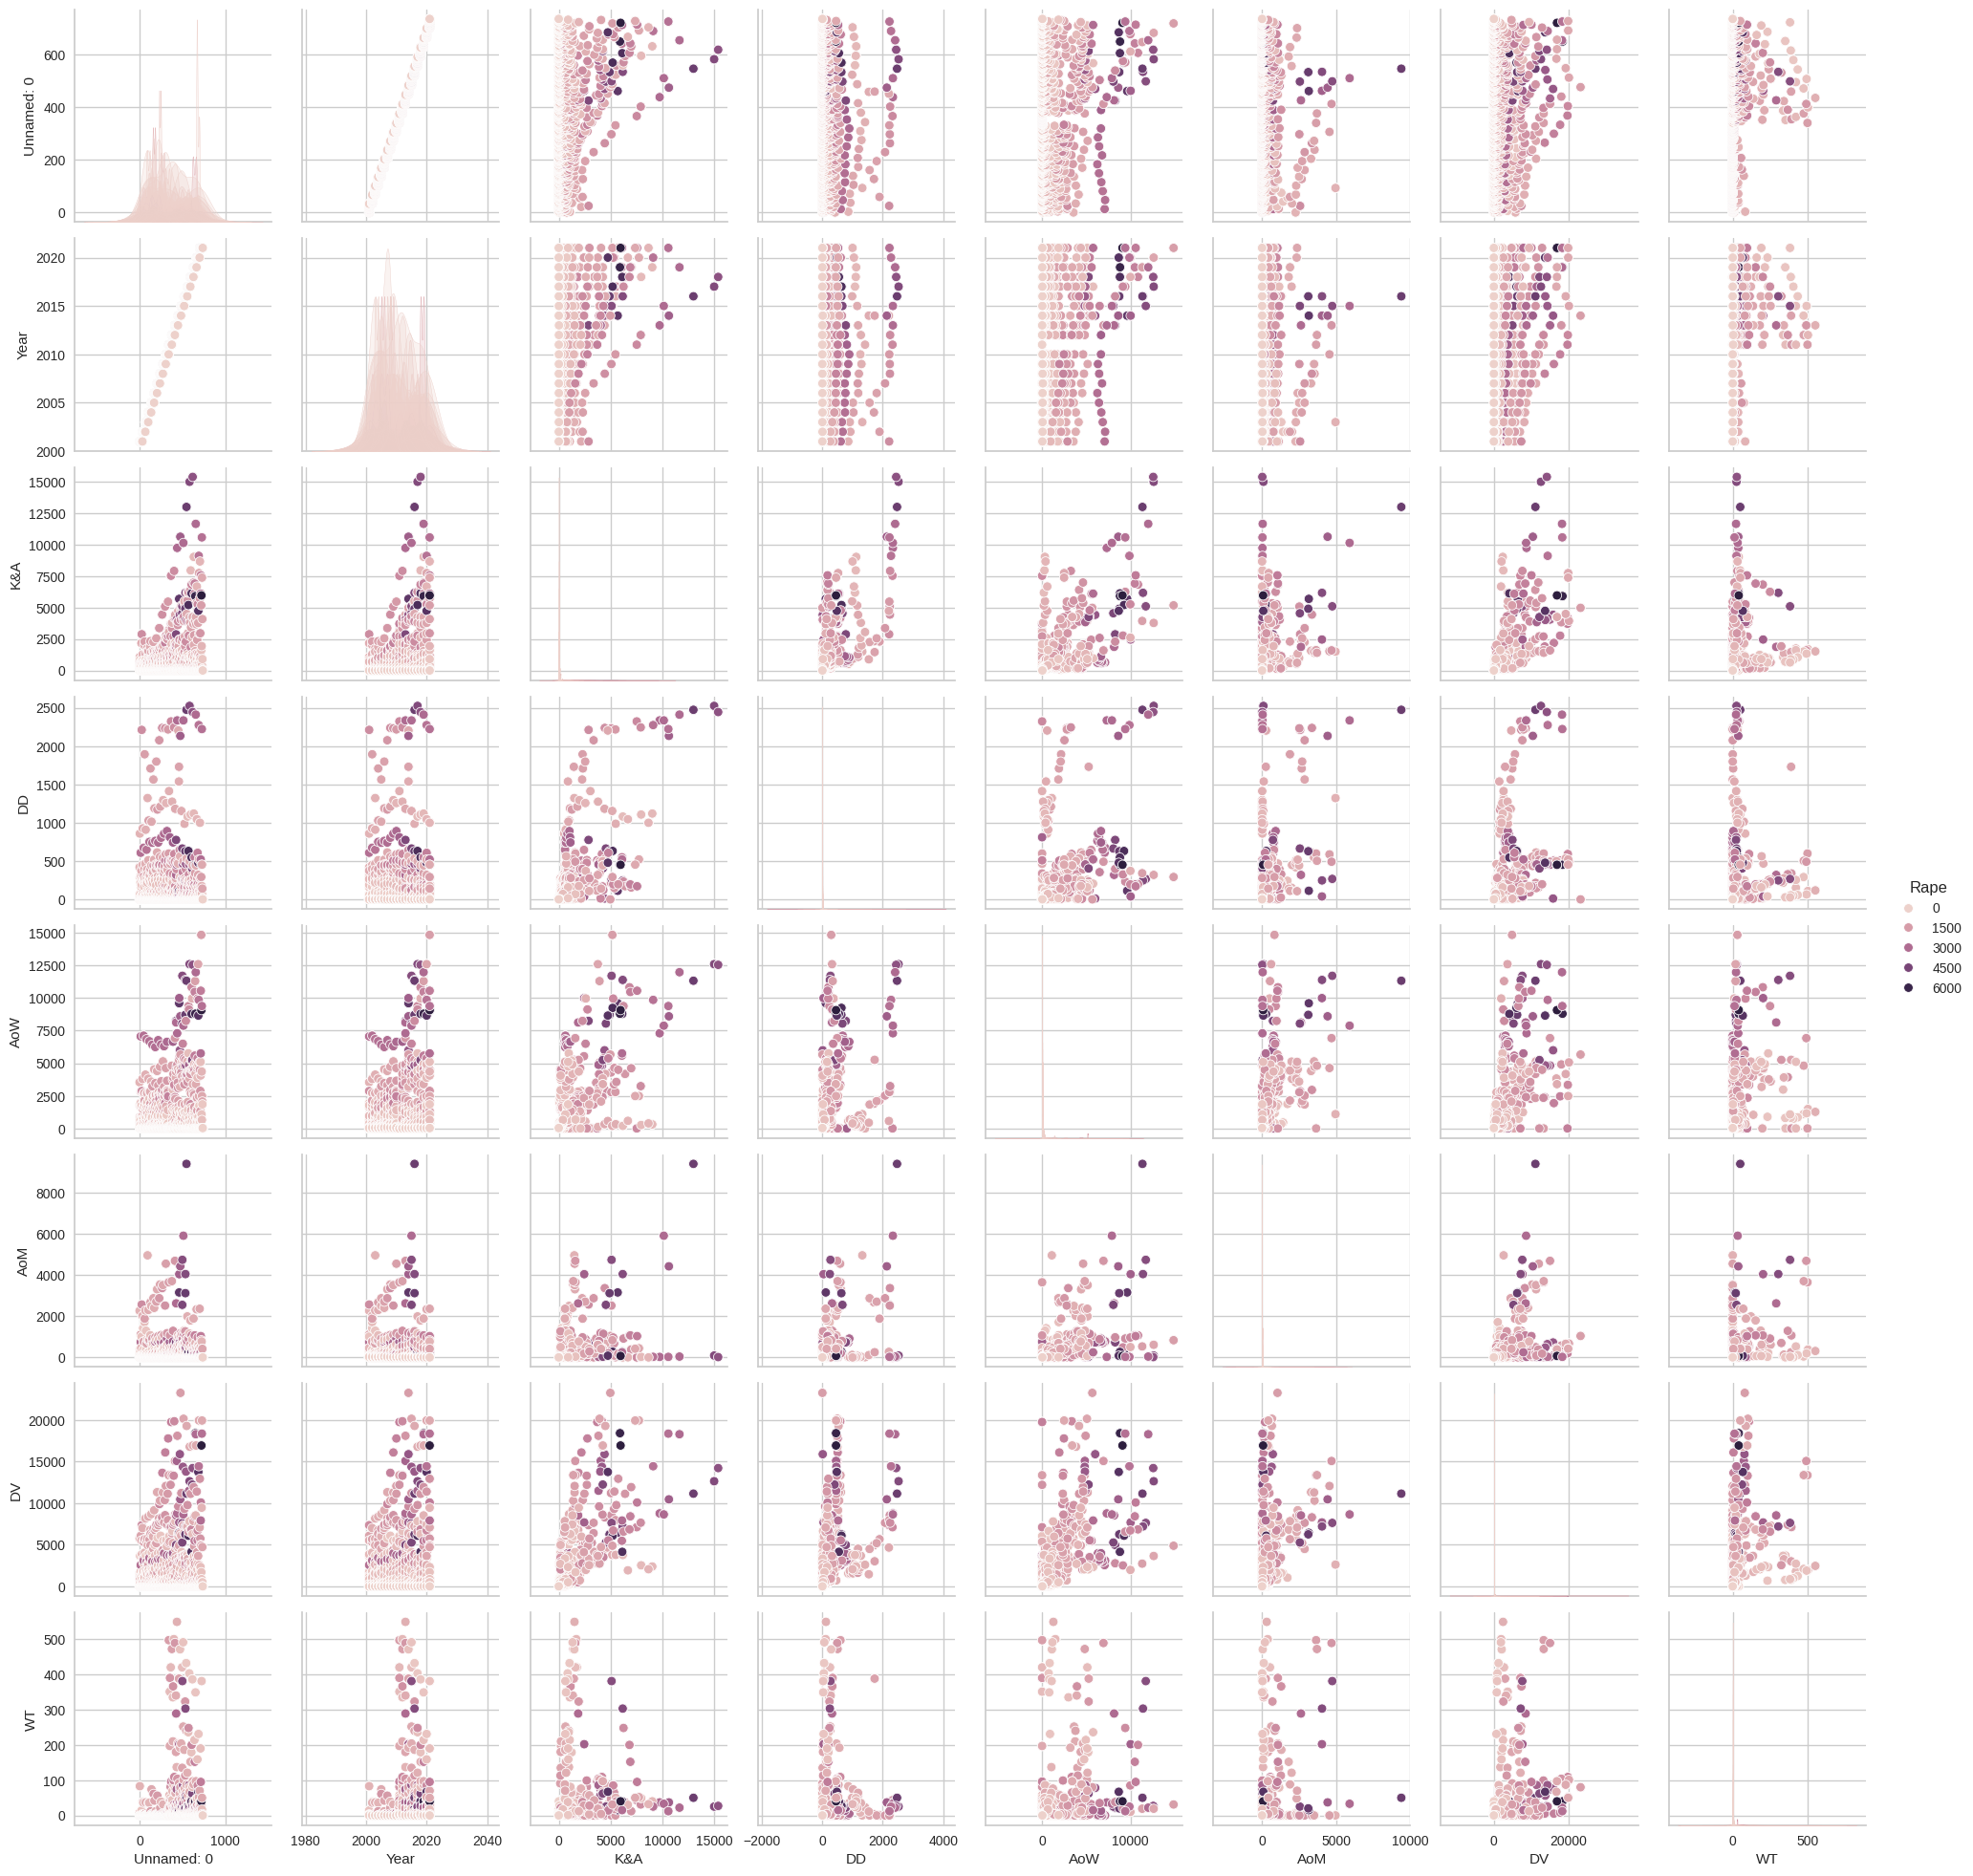

In [ ]:
# Pairplot to see the relationship between numerical variables
sns.pairplot(df, hue='Rape')
plt.show()

In [ ]:
# Check the amount of blank data in each column
print("Number of Missing Values:")
print(df.isnull().sum())

# Delete rows that have blank data
df = df.dropna()

# Or, fill in a blank value (for example, with a mean for a numeric column)
# df.fillna(df.mean(), inplace=True)

Number of Missing Values:
Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64


In [ ]:
# Check and delete duplicate data
print(f"Total Duplicate Data: {df.duplicated().sum()}")
df = df.drop_duplicates()

Total Duplicate Data: 2208


In [ ]:
# Standardization of numerical data
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Normalization
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
# Using the IQR method to detect outliers
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers
df = df[((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Encoding labels for State columns
df['State'] = LabelEncoder().fit_transform(df['State'])

# Binning in the Dowry Deaths (DD) column
df['DD_Bin'] = pd.cut(df['DD'], bins=[0, 10, 50, 100, 1000, 10000], labels=['Zero', 'Very Low', 'Low', 'High', 'Very High'])

In [ ]:
# Determining the optimal number of clusters using the Elbow Method
inertia = []
range_n_clusters = range(1, 11)
# Saves only numeric columns
df = df.select_dtypes(include=[np.number])
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

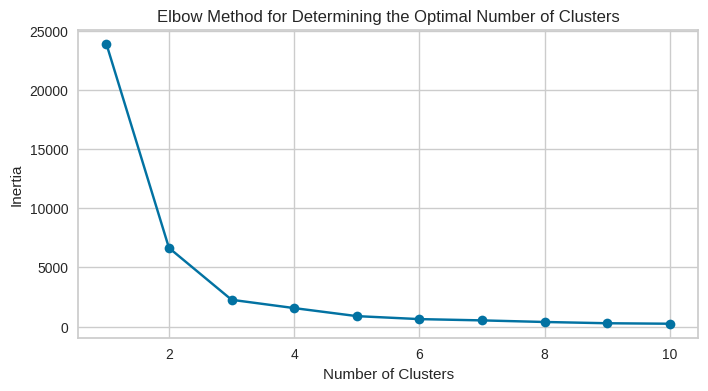

In [ ]:
# Elbow Method Visualization
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining the Optimal Number of Clusters')
plt.show()

In [ ]:
# Calculating the Silhouette Score for each cluster count
silhouette_scores = []
for k in range(2, 11): # Starting from 2 because the Silhouette Score is not defined for 1 cluster
  kmeans = KMeans(n_clusters=k, random_state=0)
  cluster_labels = kmeans.fit_predict(df)
  silhouette_avg = silhouette_score(df, cluster_labels)
  silhouette_scores.append(silhouette_avg)

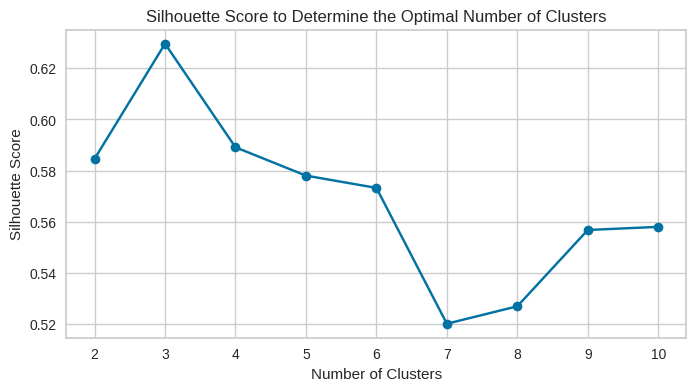

In [ ]:
# Silhouette Score Visualization
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to Determine the Optimal Number of Clusters')
plt.show()

In [ ]:
# Select the appropriate number of clusters based on plot
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(df)
# Adding cluster labels to the dataset
df['Cluster'] = cluster_labels

In [ ]:
# Calculate Silhouette Score to assess cluster quality
silhouette_avg = silhouette_score(df, cluster_labels)
print(f'Silhouette Score for {n_clusters} cluster: {silhouette_avg}')

Silhouette Score for 2 cluster: 0.5865149199351936


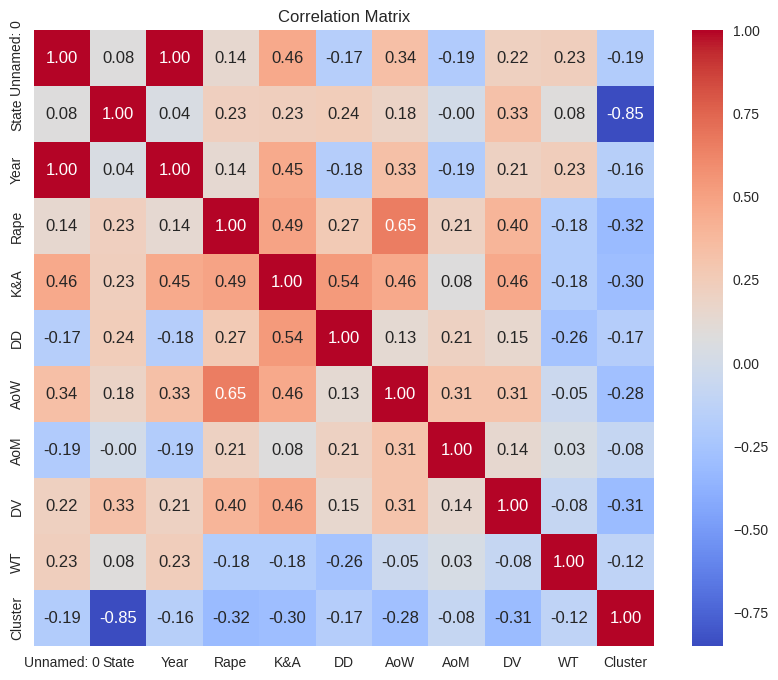

In [ ]:
# Stage 1: Correlation Analysis and Feature Selection
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Remove features that have a high correlation, e.g. if the correlation > 0.0
# (Make sure to adjust the feature according to the correlation analysis above)
df_reduced = df.drop(columns=['Unnamed: 0', 'Year', 'Rape', 'State'])

In [ ]:
# Alternative: Use PCA to reduce dimensions
pca = PCA(n_components=2)  # Take 4 main components
df_pca = pca.fit_transform(df)


In [ ]:
# Stage 2: Train the Model with Selected Features
# Finding the optimal number of clusters with the Elbow Method for feature selection result data
inertia = []
range_n_clusters = range(1, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

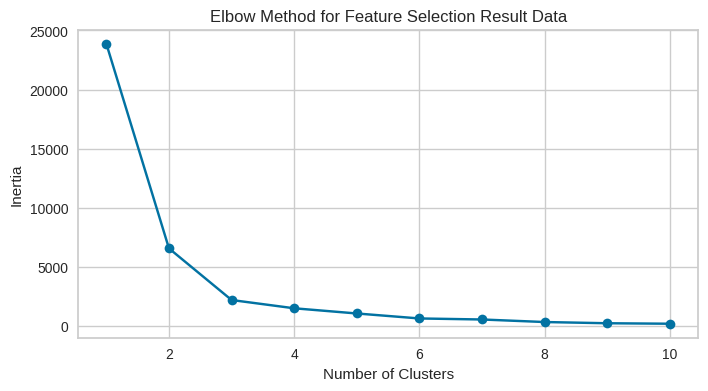

In [ ]:
# Visualisasi Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Feature Selection Result Data')
plt.show()


In [ ]:
# Select the optimal number of clusters
optimal_clusters = 2
kmeans_optimized = KMeans(n_clusters=optimal_clusters, random_state=0)
df_reduced['Cluster'] = kmeans_optimized.fit_predict(df_pca)


In [ ]:
# Stage 3: Performance Evaluation and Comparison
silhouette_original = silhouette_score(df, KMeans(n_clusters=optimal_clusters, random_state=0).fit_predict(df))
silhouette_reduced = silhouette_score(df_reduced, df_reduced['Cluster'])

In [ ]:
print(f'Silhouette Score before feature selection: {silhouette_original}')
print(f'Silhouette Score after feature selection: {silhouette_reduced}')

Silhouette Score before feature selection: 0.5865149199351936
Silhouette Score after feature selection: 0.5007726370672777


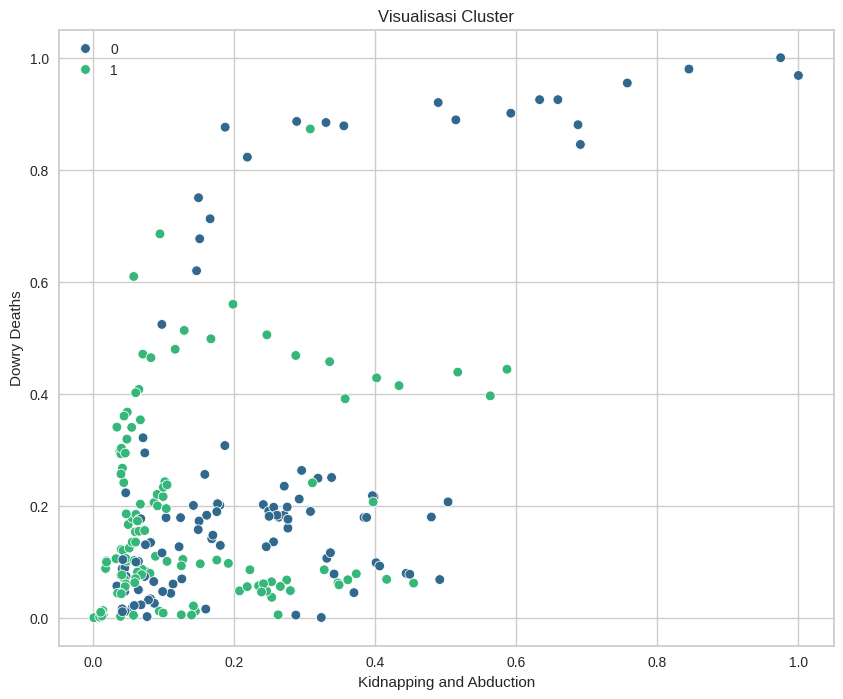

In [ ]:
centroids = kmeans.cluster_centers_
x_column = 'K&A'
y_column = 'DD'

#Create scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_reduced, x=x_column, y=y_column, hue='Cluster', palette='viridis')
plt.title('Visualisasi Cluster')
plt.xlabel('Kidnapping and Abduction')
plt.ylabel('Dowry Deaths')
plt.legend()

plt.show()

In [ ]:
print("Centroids Value:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Kidnapping and Abduction = {centroid[0]:.2f}, Dowry Deaths = {centroid[1]:.2f}")
df_reduced.to_csv('data_clustering.csv', index=False)

Centroids Value:
Centroid 1: Kidnapping and Abduction = 10.25, Dowry Deaths = -0.11
Centroid 2: Kidnapping and Abduction = -6.69, Dowry Deaths = -0.15
Centroid 3: Kidnapping and Abduction = -1.91, Dowry Deaths = -0.15
Centroid 4: Kidnapping and Abduction = -14.70, Dowry Deaths = 0.11
Centroid 5: Kidnapping and Abduction = 4.67, Dowry Deaths = 0.30
Centroid 6: Kidnapping and Abduction = 16.93, Dowry Deaths = -0.09
Centroid 7: Kidnapping and Abduction = 1.29, Dowry Deaths = 0.10
Centroid 8: Kidnapping and Abduction = 13.77, Dowry Deaths = -0.07
Centroid 9: Kidnapping and Abduction = -11.56, Dowry Deaths = -0.05
Centroid 10: Kidnapping and Abduction = 7.30, Dowry Deaths = 0.22
